In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("C:\\Users\\harsha k\\Desktop\\Fligth fare predection\\Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data['Journey of day']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data['journey of month']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
data.drop("Date_of_Journey",axis=1,inplace=True)

In [8]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey of day,journey of month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [9]:
data['Dep_hours']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute
data.drop("Dep_Time",axis=1,inplace=True)

In [10]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey of day,journey of month,Dep_hours,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [11]:
data['Arrival_hours']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_mins']=pd.to_datetime(data.Arrival_Time).dt.minute
data.drop("Arrival_Time",axis=1,inplace=True)

In [12]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey of day,journey of month,Dep_hours,Dep_min,Arrival_hours,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:


# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration



In [14]:
data['Duration_hrs']=duration_hours
data['Duration_mins']=duration_mins
data.drop('Duration',axis=1,inplace=True)

In [15]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey of day,journey of month,Dep_hours,Dep_min,Arrival_hours,Arrival_mins,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40



Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order --> LabelEncoder is used in this case



In [16]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

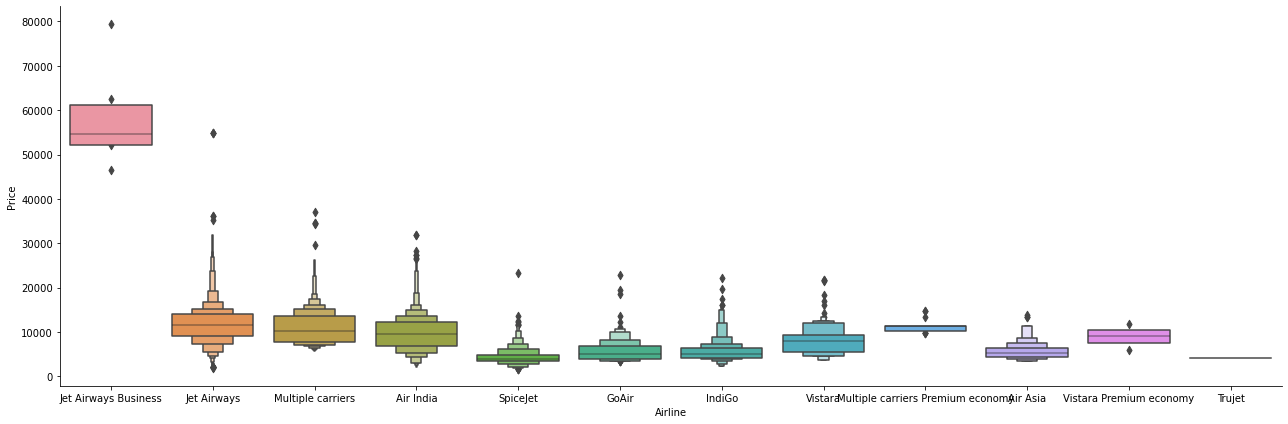

In [17]:
sns.catplot(y='Price',x="Airline",data=data.sort_values('Price',ascending=False), kind='boxen',height=6,aspect=3)
plt.show()

In [18]:
Airline=data['Airline']
Airline=pd.get_dummies(Airline, drop_first=True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [19]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [20]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

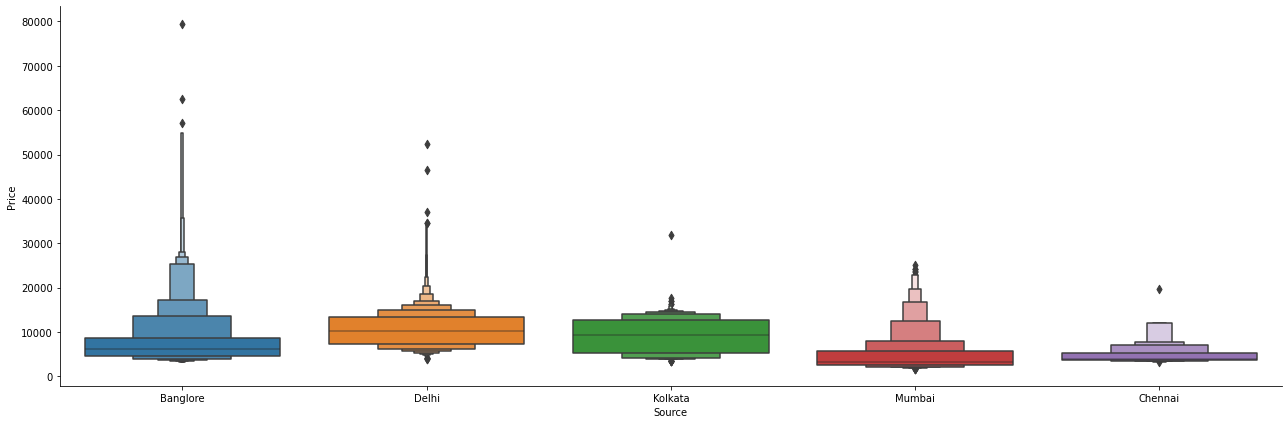

In [21]:
sns.catplot(y="Price", x="Source", data=data.sort_values('Price', ascending=False), kind='boxen',height=6,aspect=3)

In [22]:
Source=data['Source']
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
Destination=data[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

data["Total_Stops"].value_counts()




1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
data.replace({"1 stop":0,"non-stop":1, "2 stops":2, "3 stops":3, "4 stops":4},inplace=True)

In [27]:
data_train=pd.concat([data,Airline,Source,Destination ], axis=1)

In [28]:
data_train

,Airline,Source,Destination,Total_Stops,Price,Journey of day,journey of month,Dep_hours,Dep_min,Arrival_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,1,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,1,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,1,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,1,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,1,12648,1,3,11,30,14,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [30]:
data_train

,Total_Stops,Price,Journey of day,journey of month,Dep_hours,Dep_min,Arrival_hours,Arrival_mins,Duration_hrs,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,1,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,1,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,1,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Total_Stops       10682 non-null  int64 
 4   Price             10682 non-null  int64 
 5   Journey of day    10682 non-null  int64 
 6   journey of month  10682 non-null  int64 
 7   Dep_hours         10682 non-null  int64 
 8   Dep_min           10682 non-null  int64 
 9   Arrival_hours     10682 non-null  int64 
 10  Arrival_mins      10682 non-null  int64 
 11  Duration_hrs      10682 non-null  int64 
 12  Duration_mins     10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [32]:
test_data=pd.read_excel("C:\\Users\\harsha k\\Desktop\\Fligth fare predection\\Test_set.xlsx")
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [34]:
test_data['Date_of_day']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Date_of_month']=pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop("Date_of_Journey",axis=1,inplace=True)

In [35]:
test_data['Dep_hours']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_mins']=pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop("Dep_Time",axis=1,inplace=True)

In [36]:
test_data['Arrival_hours']=pd.to_datetime(test_data.Arrival_Time ).dt.hour
test_data['Arrival_mins']=pd.to_datetime(test_data.Arrival_Time ).dt.minute
test_data.drop("Arrival_Time",axis=1,inplace=True)

In [37]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [38]:
test_data['Duration hours']=duration_hours
test_data['Duration mins']=duration_mins
test_data.drop('Duration',axis=1,inplace=True)

In [39]:
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)


In [40]:
test_data

,Airline,Source,Destination,Total_Stops,Date_of_day,Date_of_month,Dep_hours,Dep_mins,Arrival_hours,Arrival_mins,Duration hours,Duration mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,6,3,4,0,19,15,15,15


In [41]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
test_data.replace({"1 stop":0,"non-stop":1, "2 stops":2, "3 stops":3, "4 stops":4},inplace=True)

In [43]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [44]:
Airline=pd.get_dummies(test_data['Airline'], drop_first=True)
Source=pd.get_dummies(test_data['Source'], drop_first=True)
Destination=pd.get_dummies(test_data['Destination'], drop_first=True)


In [46]:
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)

In [47]:
data_test

,Airline,Source,Destination,Total_Stops,Date_of_day,Date_of_month,Dep_hours,Dep_mins,Arrival_hours,Arrival_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,0,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,0,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,0,21,5,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,0,21,5,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,1,24,6,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,0,6,6,20,30,20,25,...,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,1,27,3,14,20,16,55,...,0,0,0,1,0,0,0,0,0,0
2668,Jet Airways,Delhi,Cochin,0,6,3,21,50,4,25,...,0,0,1,0,0,1,0,0,0,0
2669,Air India,Delhi,Cochin,0,6,3,4,0,19,15,...,0,0,1,0,0,1,0,0,0,0


In [48]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_test.shape

(2671, 28)

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Date_of_day                        2671 non-null   int64
 2   Date_of_month                      2671 non-null   int64
 3   Dep_hours                          2671 non-null   int64
 4   Dep_mins                           2671 non-null   int64
 5   Arrival_hours                      2671 non-null   int64
 6   Arrival_mins                       2671 non-null   int64
 7   Duration hours                     2671 non-null   int64
 8   Duration mins                      2671 non-null   int64
 9   Air India                          2671 non-null   uint8
 10  GoAir                              2671 non-null   uint8
 11  IndiGo                             2671 non-null   uint8
 12  Jet Airways         

<AxesSubplot:>

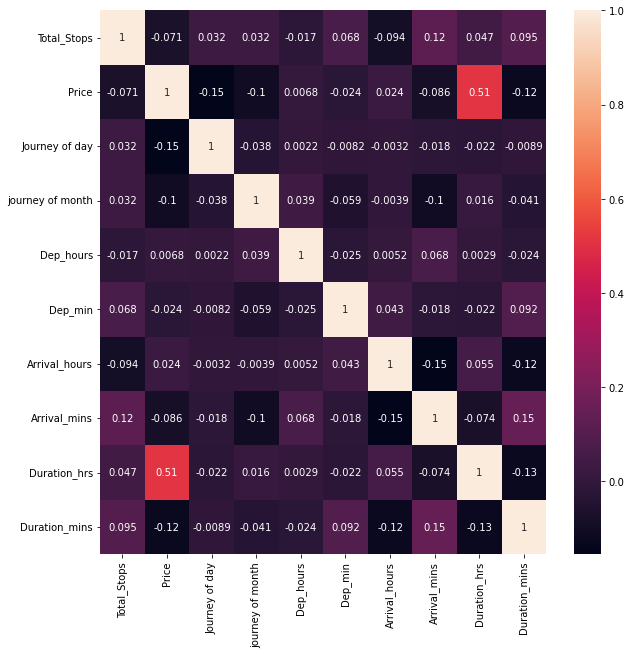

In [50]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey of day', 'journey of month',
       'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_mins', 'Duration_hrs',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
x = data_train.loc[:, ['Total_Stops', 'Journey of day', 'journey of month',
       'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_mins', 'Duration_hrs',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]


y = data_train.iloc[:, 1]

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x, y ,test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8545, 29)
(2137, 29)
(8545,)
(2137,)


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
pred_train=rf_model.predict(x_train)
pred_test=rf_model.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score

In [58]:
print('TRAIN DATA')
print('score:', rf_model.score(x_train, y_train))
#print(' accuracy_score:', accuracy_score(pred_train,y_train))
print(' mean_absolute_error:', mean_absolute_error(pred_train,y_train))
print('mean_squared_error :', mean_squared_error(pred_train,y_train))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_train,y_train)))
print(' r2_score:',r2_score(pred_train,y_train))

print('TEST DATA')
print('score:', rf_model.score(x_test, y_test))
print(' mean_absolute_error:', mean_absolute_error(pred_test,y_test))
print('mean_squared_error :', mean_squared_error(pred_test,y_test))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_test,y_test)))
print(' r2_score:',r2_score(pred_test,y_test))

TRAIN DATA
score: 0.9537116063374552
 mean_absolute_error: 571.1340489161381
mean_squared_error : 980830.4762306068
 R_mean_squared_error: 990.3688586736796
 r2_score: 0.9488192840753313
TEST DATA
score: 0.7978855515898678
 mean_absolute_error: 1178.8866875509063
mean_squared_error : 4358003.12054616
 R_mean_squared_error: 2087.583081112261
 r2_score: 0.7629418119453902


In [59]:


prediction = rf_model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


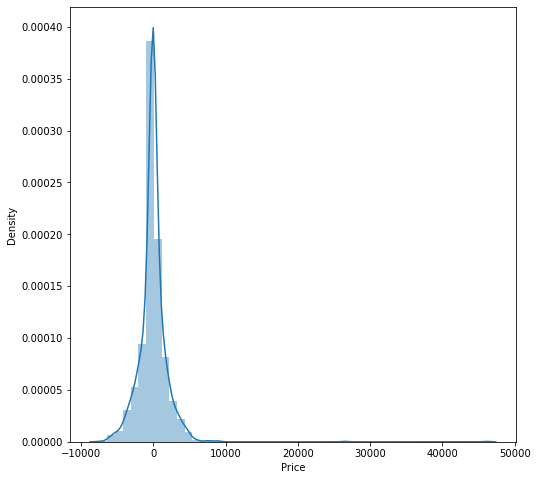

In [60]:


plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()



In [61]:
from sklearn.tree import DecisionTreeClassifier
DC_model=DecisionTreeClassifier()
DC_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [62]:
pred_train=DC_model.predict(x_train)
pred_test=DC_model.predict(x_test)
print('TRAIN DATA')
print('score:', rf_model.score(x_train, y_train))
print(' accuracy_score:', accuracy_score(pred_train,y_train))
print(' mean_absolute_error:', mean_absolute_error(pred_train,y_train))
print('mean_squared_error :', mean_squared_error(pred_train,y_train))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_train,y_train)))
print(' r2_score:',r2_score(pred_train,y_train))

print('TEST DATA')
print('score:', rf_model.score(x_test, y_test))
print(' accuracy_score:', accuracy_score(pred_test,y_test))
print(' mean_absolute_error:', mean_absolute_error(pred_test,y_test))
print('mean_squared_error :', mean_squared_error(pred_test,y_test))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_test,y_test)))
print(' r2_score:',r2_score(pred_test,y_test))

TRAIN DATA
score: 0.9537116063374552
 accuracy_score: 0.8812170860152135
 mean_absolute_error: 321.6970157987127
mean_squared_error : 1300587.5357519018
 R_mean_squared_error: 1140.4330474656992
 r2_score: 0.935161812916726
TEST DATA
score: 0.7978855515898678
 accuracy_score: 0.3532990173139916
 mean_absolute_error: 1379.081890500702
mean_squared_error : 6067378.942442677
 R_mean_squared_error: 2463.2050142939133
 r2_score: 0.724986862066177


In [63]:
from sklearn.model_selection import RandomizedSearchCV 

In [64]:
 rf_p = {
    
    "min_samples_split": list(range(2,11)),
    "min_samples_leaf" : list(range(1,10)),
    "max_depth":list(range(1,200)),
    "n_estimators": list(range(1,500))}

In [65]:


rscv = RandomizedSearchCV(rf_model , param_distributions=rf_p , cv =10 , n_iter=10  ,n_jobs = -1 , verbose = 10)



In [66]:
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=10)

In [67]:


rscv.best_estimator_



RandomForestRegressor(max_depth=156, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=116)

In [68]:
rf_model=RandomForestRegressor(max_depth=71, min_samples_split=6, n_estimators=418)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=71, min_samples_split=6, n_estimators=418)

In [69]:
print('TRAIN DATA')
print('score:', rf_model.score(x_train, y_train))
#print(' accuracy_score:', accuracy_score(pred_train,y_train))
print(' mean_absolute_error:', mean_absolute_error(pred_train,y_train))
print('mean_squared_error :', mean_squared_error(pred_train,y_train))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_train,y_train)))
print(' r2_score:',r2_score(pred_train,y_train))

print('TEST DATA')
print('score:', rf_model.score(x_test, y_test))
print(' mean_absolute_error:', mean_absolute_error(pred_test,y_test))
print('mean_squared_error :', mean_squared_error(pred_test,y_test))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_test,y_test)))
print(' r2_score:',r2_score(pred_test,y_test))

TRAIN DATA
score: 0.9284939782099878
 mean_absolute_error: 321.6970157987127
mean_squared_error : 1300587.5357519018
 R_mean_squared_error: 1140.4330474656992
 r2_score: 0.935161812916726
TEST DATA
score: 0.8105239879420284
 mean_absolute_error: 1379.081890500702
mean_squared_error : 6067378.942442677
 R_mean_squared_error: 2463.2050142939133
 r2_score: 0.724986862066177


In [70]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

C:\Users\harsha k\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
print('TRAIN DATA')
print('score:', lr_model.score(x_train, y_train))
print(' mean_absolute_error:', mean_absolute_error(pred_train,y_train))
print('mean_squared_error :', mean_squared_error(pred_train,y_train))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_train,y_train)))
print(' r2_score:',r2_score(pred_train,y_train))

print('TEST DATA')
print('score:', lr_model.score(x_test, y_test))
print(' mean_absolute_error:', mean_absolute_error(pred_test,y_test))
print('mean_squared_error :', mean_squared_error(pred_test,y_test))
print(' R_mean_squared_error:', np.sqrt(mean_squared_error(pred_test,y_test)))
print(' r2_score:',r2_score(pred_test,y_test))

TRAIN DATA
score: 0.2468110005851375
 mean_absolute_error: 321.6970157987127
mean_squared_error : 1300587.5357519018
 R_mean_squared_error: 1140.4330474656992
 r2_score: 0.935161812916726
TEST DATA
score: 0.2068320074871315
 mean_absolute_error: 1379.081890500702
mean_squared_error : 6067378.942442677
 R_mean_squared_error: 2463.2050142939133
 r2_score: 0.724986862066177


In [72]:
import pickle
file=open('fligth_rf.pkl','wb')
pickle.dump(rf_model,file)

